In [20]:
import numpy
import cv2
import pytesseract
import requests
import nltk
from googlesearch import search
from html.parser import HTMLParser

from nltk.corpus import stopwords
from PIL import Image
from textblob import TextBlob
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Maria
[nltk_data]     Angélica\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [51]:
!pip install urllib2

  ERROR: Could not find a version that satisfies the requirement urllib2 (from versions: none)
ERROR: No matching distribution found for urllib2


In [31]:
img = cv2.imread('whats.PNG')
text = pytesseract.image_to_string(Image.open('whats.PNG'), lang='eng')
print(text)
blob = TextBlob(text).translate(to='en')
blobPT = TextBlob(text)
print(blob.words)
print(blob.sentiment)
print(blobPT.words)

pt_stops = set(stopwords.words('portuguese'))
#en_stops = set(stopwords.words('english'))
textoPesquisa = ""

for word in blobPT.words: 
    if word not in pt_stops:
        textoPesquisa += word + " "
        
print(textoPesquisa)

+55 11 94356-0047
O que é foda € nao ter achievements e nem ter como ve ter um carrinho de
compras... Até 0 fato de no ter achievements, tudo bem, mas carrinho de
compra é um bsico pra qq site de compra online
['55', '11', '94356-0047', 'What', 'the', 'fuck', '€', 'does', 'not', 'have', 'achievements', 'and', 'how', 'to', 'have', 'a', 'stroller', 'shopping', 'Up', 'to', 'the', 'fact', 'that', 'there', 'are', 'no', 'achievements', 'fine', 'but', 'a', 'shopping', 'cart', 'purchase', 'is', 'a', 'basic', 'qq', 'online', 'shopping', 'site']
Sentiment(polarity=0.005555555555555554, subjectivity=0.4083333333333334)
['55', '11', '94356-0047', 'O', 'que', 'é', 'foda', '€', 'nao', 'ter', 'achievements', 'e', 'nem', 'ter', 'como', 've', 'ter', 'um', 'carrinho', 'de', 'compras', 'Até', '0', 'fato', 'de', 'no', 'ter', 'achievements', 'tudo', 'bem', 'mas', 'carrinho', 'de', 'compra', 'é', 'um', 'bsico', 'pra', 'qq', 'site', 'de', 'compra', 'online']
55 11 94356-0047 O foda € nao ter achievements ter

55 11 94356-0047 O foda € nao ter achievements ter ve ter carrinho compras Até 0 fato ter achievements tudo bem carrinho compra bsico pra qq site compra online - Pesquisa Google
(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var h=function(g){g&&g.target.setAttribute("data-iml",Date.n
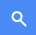

In [21]:
google = "https://www.google.com/search?q="+textoPesquisa
efarsas = "http://www.e-farsas.com/?s="+textoPesquisa
f = requests.get(google)
#print(f.text)

class MyHTMLParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        #print("Encountered a start tag:", tag)
        ''

    def handle_endtag(self, tag):
        #print("Encountered an end tag :", tag)
        ''

    def handle_data(self, data):
        print(data)

parser = MyHTMLParser()
#teste = parser.feed(f.text)
parser.feed(f.text)

textoPesquisa = ' '.join(e for e in textoPesquisa if e.isalnum()).encode('utf8')

print(textoPesquisa)
for url in search(textoPesquisa, stop=5):
    print(url)


In [50]:
import urllib.request
from bs4 import BeautifulSoup

url = "https://www.google.com/search?q="+textoPesquisa.replace(' ','%20').replace('-','%20').replace('€','%20').replace('é','%20')
print(url)
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
headers={'User-Agent':user_agent} 
req = urllib.Request(url, headers=hdr)
html = urllib.request.urlopen(req).read()
soup = BeautifulSoup(html)

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

print(text)

https://www.google.com/search?q=55%2011%2094356%200047%20O%20foda%20%20%20nao%20ter%20achievements%20ter%20ve%20ter%20carrinho%20compras%20At%20%200%20fato%20ter%20achievements%20tudo%20bem%20carrinho%20compra%20bsico%20pra%20qq%20site%20compra%20online%20


AttributeError: module 'urllib' has no attribute 'Request'

In [14]:
!pip install google

In [53]:
import urllib
from bs4 import BeautifulSoup

url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html)

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

print(text)

BBC NEWS | Health | Blondes 'to die out in 200 years'
NEWS
SPORT
WEATHER
WORLD SERVICE
A-Z INDEX
SEARCH
You are in: Health
News Front Page
Africa
Americas
Asia-Pacific
Europe
Middle East
South Asia
UK
Business
Entertainment
Science/Nature
Technology
Health
Medical notes
-------------
Talking Point
-------------
Country Profiles
In Depth
-------------
Programmes
-------------
SERVICES
Daily E-mail
News Ticker
Mobile/PDAs
-------------
Text Only
Feedback
Help
EDITIONS
Change to UK
Friday, 27 September, 2002, 11:51 GMT 12:51 UK
Blondes 'to die out in 200 years'
Scientists believe the last blondes will be in Finland
The last natural blondes will die out within 200 years, scientists believe.
A study by experts in Germany suggests people with blonde hair are an endangered species and will become extinct by 2202.
Researchers predict the last truly natural blonde will be born in Finland - the country with the highest proportion of blondes.
The frequency of blondes may drop but they won't disap